**Name:** Pranoti Santosh Musmade

**PRN:** 123B1B054

**Assignment No. 1**

**Title:**

Select/download dataset from UCI/Kaggle or any other repository. Perform data cleaning and exploratory
data analysis (EDA) to gain insights from data
Data cleaning can be following but not limited to:
1. Handle missing values
2. Detect and treat outliers
3. Convert categorical data to numerical
4. Plot distributions
5. Analyze data using correlation  
6. Feature selection

In [ ]:
import pandas as pd
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.sample(5)   #any 5

,age,sex,bmi,children,smoker,region,charges
655,52,female,25.30,2,yes,southeast,24667.4190
1141,41,female,32.60,3,no,southwest,7954.5170
997,63,female,36.85,0,no,southeast,13887.9685
1174,29,male,32.11,2,no,northwest,4433.9159
1095,18,female,31.35,4,no,northeast,4561.1885


In [ ]:
df.sample(5, random_state = 42)   #gives fix 5 sample when running each time

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No null values are there.
If null values are present then
1.drop the entire column if more null values are there
2.use fillna method and fill null values with either mean, median or mode


In [ ]:
#show unique values in region and sex columns
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
print(df['sex'].unique())

['female' 'male']


for converting categorica; column into numeric there are following methods
1. One-Hot Encoding:
Converts each category into a binary column (0/1).
Avoids ordinal relationships.
Use when Categories are nominal (no order).
2. Label Encoding :
Converts categories into integers (e.g., "Red", "Green", "Blue" → 0, 1, 2)
Use when: The categories have an order (ordinal data).
3. Ordinal Encoding :
Similar to Label Encoding but you can manually define the order.
Use when: You have ordinal categories like "Low" < "Medium" < "High".
4. Binary Encoding :
Combines hashing and one-hot encoding.
Converts categories to binary numbers and then splits into separate columns.
Good for: High-cardinality categorical variables.
5.Target Encoding (Mean Encoding) :
Replace category with mean of target variable for that category.
Use with care can cause data leakage.

In [ ]:
#using one hot encoding for sex column - it creates a new column in which if male = 1, female = 0
df1 = pd.get_dummies(df,columns = ["sex"],drop_first = True, dtype = int)
df1.sample(5)

,age,bmi,children,smoker,region,charges,sex_male
31,18,26.315,0,no,northeast,2198.18985,0
124,47,33.915,3,no,northwest,10115.00885,0
883,51,37.050,3,yes,northeast,46255.11250,0
593,21,21.850,1,yes,northeast,15359.10450,0
5,31,25.740,0,no,southeast,3756.62160,0


In [ ]:
#get dummies does not support inplace = True so create new dataframe
df2 = pd.get_dummies(df1,columns = ["region"], drop_first = True, dtype = int)
df2.head(2)

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,yes,16884.9240,0,0,0,1
1,18,33.77,1,no,1725.5523,1,0,1,0


Scaling numerical values
1. using Standard Scaler:
It transforms your data to have:
Mean = 0
Standard deviation = 1
Formula:
𝑥scaled = (𝑥 -μ) / 𝜎
Where:
μ = mean of the feature
σ = standard deviation
2. MinMaxScaler - 	Scales to [0, 1]
3. RobustScaler - Centers using median, scales by IQR
4. Normalizer - Normalizes rows (not columns) to unit norm

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[["age", "bmi", "charges"]] = scaler.fit_transform(df[["age","bmi","charges"]])

In [ ]:
df2.sample(5)

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
1083,-0.513149,0.137240,1,no,-0.759484,1,0,0,1
939,0.982076,-0.194130,0,no,-0.312485,1,0,1,0
900,0.697271,-1.336700,0,no,-0.378470,1,0,0,0
637,-0.299545,1.219113,2,no,0.961930,0,0,0,0
659,1.266881,-0.308141,4,no,0.092848,0,0,0,0


In [ ]:
print(df2.duplicated().sum())

1


In [ ]:
df2[df2.duplicated()]

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
581,-1.438764,-0.01204,0,no,-0.960792,1,1,0,0


In [ ]:
#to find all columns that are repeated for particular subset
duplicates = df2[df2.duplicated(subset=["age"])]
print(df2.duplicated(subset = ["age"]).sum())
print(duplicates)

1291
           age       bmi  children smoker   charges  sex_male  \
8    -0.157143 -0.136714         2     no -0.567017         1   
15   -1.438764 -0.994667         1     no -0.944463         1   
17   -1.153959 -1.118520         0     no -0.898374         1   
18    1.195680  1.580832         0     no -0.220399         1   
20    1.480485  0.876261         0     no -0.003434         0   
...        ...       ...       ...    ...       ...       ...   
1333  0.768473  0.050297         3     no -0.220551         1   
1334 -1.509965  0.206139         0     no -0.914002         0   
1335 -1.509965  1.014878         0     no -0.961596         0   
1336 -1.296362 -0.797813         0     no -0.930362         0   
1337  1.551686 -0.261388         0    yes  1.311053         0   

      region_northwest  region_southeast  region_southwest  
8                    0                 0                 0  
15                   0                 0                 1  
17                   0         

In [ ]:
df2.drop_duplicates(inplace = True)
print(df2.duplicated().sum())

0


In [ ]:
df2.shape

(1337, 9)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

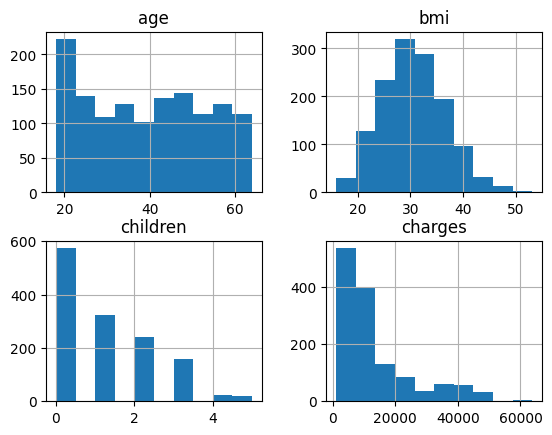

In [ ]:
#distribution plot of numerical features showing frequency
df.hist()

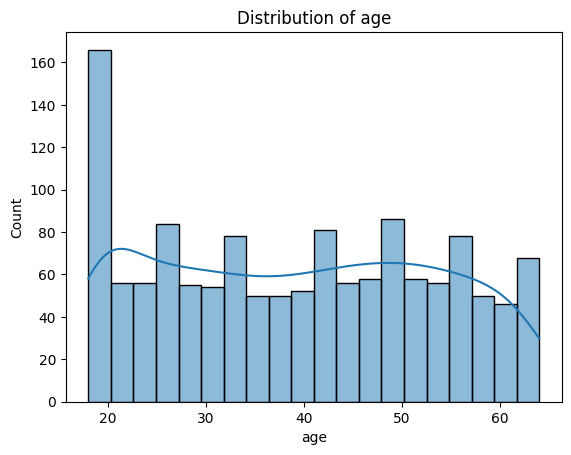

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["age"], kde = True, bins = 20)
plt.title("Distribution of age")
plt.show()

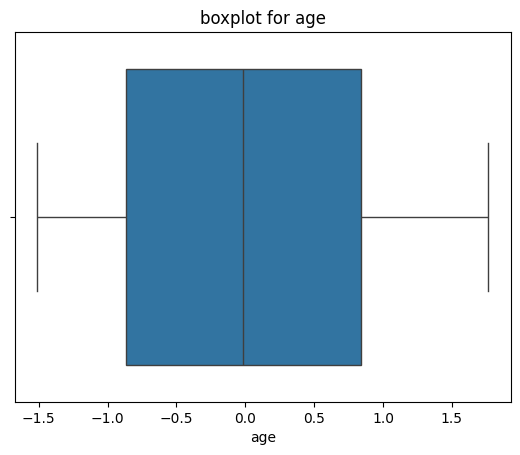

In [ ]:
sns.boxplot(x = df2["age"])
plt.title("boxplot for age")
plt.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y = "age",width=600, height=400)
fig.show()

for Outlier detection there are 3 methods
1. Zscore
2. IQR
3. Boxplot


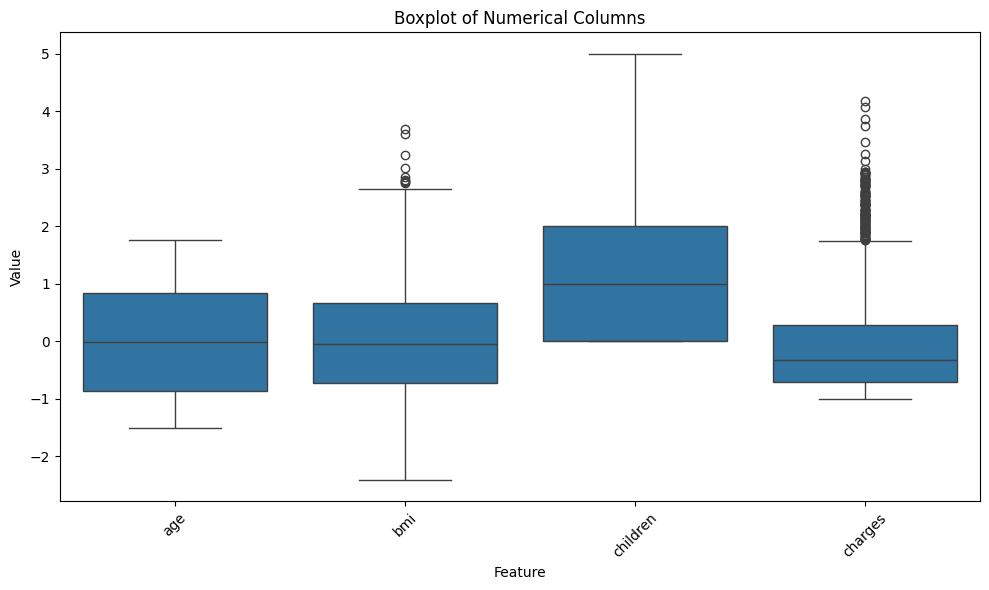

In [ ]:
#Outlier detection using boxplot

selected_cols = ['age', 'bmi', 'children', 'charges']

cols = df2[selected_cols]

# Melt the DataFrame to long format
melted_df = cols.melt(var_name='Feature', value_name='Value')

# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.tight_layout()
plt.show()

for removing outliers there are 3 ways:
1. IQR - either remove all outliers or first replace with NaN nd the replace it by mean, median or mode
2. clip/cap - outliers repalce by lower/ upper bound
3. Use RobustScaler - Scales using median & IQR

In [ ]:
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

df2 = clip_outliers_iqr(df2, 'bmi')
df2 = clip_outliers_iqr(df2, 'charges')


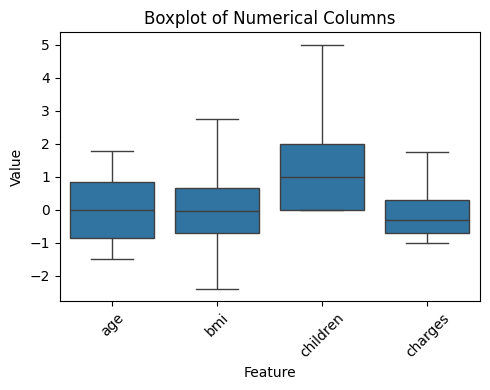

In [ ]:
selected_cols = ['age', 'bmi', 'children', 'charges']

cols = df2[selected_cols]

# Melt the DataFrame to long format
melted_df = cols.melt(var_name='Feature', value_name='Value')

# Create boxplots
plt.figure(figsize=(5, 4))
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.tight_layout()
plt.show()

In [ ]:
#Analyzing data using correlation

correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


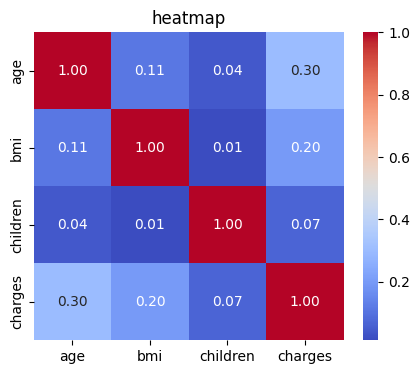

In [ ]:
plt.figure(figsize = (5,4))
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm", fmt = ".2f")
plt.title("heatmap")
plt.show()

In [ ]:
print(df2["smoker"].unique())

['yes' 'no']


In [ ]:
#converting categorical column smoker into numerical
df2['smoker'] = df2['smoker'].map({'yes': 1, 'no': 0})
df2.head(5)

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,1,0.298584,0,0,0,1
1,-1.509965,0.509621,1,0,-0.953689,1,0,1,0
2,-0.797954,0.383307,3,0,-0.728675,1,0,1,0
3,-0.441948,-1.305531,0,0,0.719843,1,1,0,0
4,-0.513149,-0.292556,0,0,-0.776802,1,1,0,0


Mutual Information Scores:
age                 1.446060
smoker              0.365181
sex_male            0.174352
children            0.163735
bmi                 0.071459
region_northwest    0.049686
region_southeast    0.027765
region_southwest    0.007157
dtype: float64


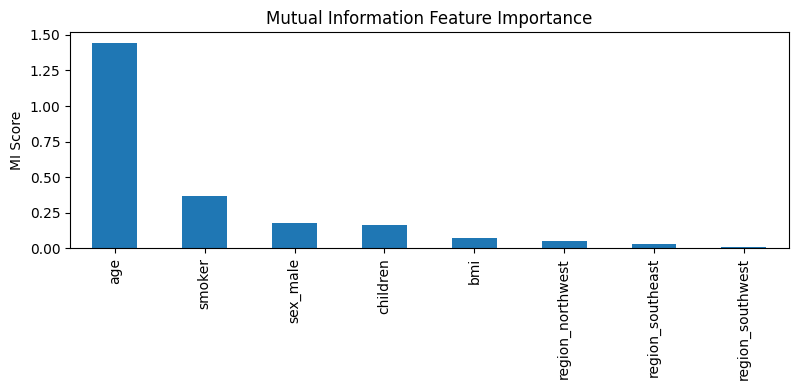

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Separate features and target
X = df2.drop(columns=['charges'])  # features
y = df2['charges']                 # target variable

# Compute Mutual Information scores
mi_scores = mutual_info_regression(X, y, discrete_features='auto')

#Display scores
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_series)

#Visualize
mi_series.plot(kind='bar', title='Mutual Information Feature Importance', figsize=(8, 4))
plt.ylabel("MI Score")
plt.tight_layout()
plt.show()


In [ ]:
# Select features based on MI scores
selected_features = ['age', 'smoker', 'sex_male', 'children']

# Create new X with only important features
X_selected = df2[selected_features]
y = df2['charges']

In [ ]:
X_selected.sample(10)

,age,smoker,sex_male,children
855,-1.367563,0,0,0
1113,-0.797954,0,0,3
1153,-0.299545,0,0,1
1253,0.056461,0,0,4
427,-1.509965,0,0,0
144,-0.655551,1,1,3
538,0.483668,0,0,1
1114,-1.153959,0,1,0
104,-0.370746,0,0,1
635,1.765289,0,1,0


Explained Variance Ratio by each component:
PC1: 0.5090
PC2: 0.3470
PC3: 0.0881
PC4: 0.0559


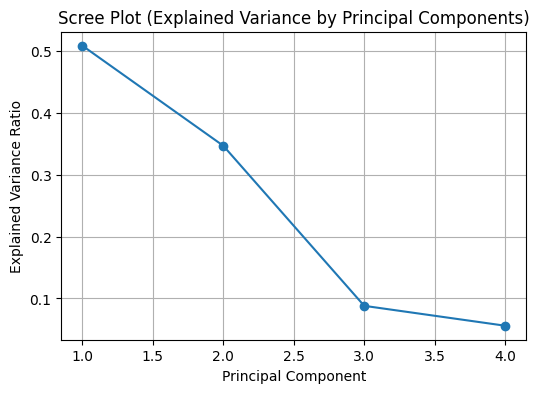

In [ ]:
from sklearn.decomposition import PCA

# Assuming `X_selected` is your DataFrame with selected and scaled features
X = X_selected[['age', 'smoker', 'sex_male', 'children']]

# Step 1: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 2: Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

# Step 3: Scree Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Scree Plot (Explained Variance by Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_selected)

# Create DataFrame
pca_2_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
print(pca_2_df.head())

        PC1       PC2
0 -1.247565 -1.315510
1 -0.255161 -1.496318
2  1.810084 -1.004754
3 -1.133660 -0.326701
4 -1.141366 -0.397471


**Conclusion**:

In this assignment, we successfully performed essential data preprocessing steps that form the foundation of any machine learning workflow. We began by cleaning the dataset, handling missing values, removing duplicates, and detecting and treating outliers to ensure the data’s quality and reliability. The distribution of features was analyzed using histograms, which provided valuable insights into the nature and spread of the data. Furthermore, we used mutual information and correlation analysis to identify the most significant relationships between variables and to understand feature dependencies.
Overall, these steps helped improve the quality and structure of the dataset, making it more suitable for building accurate and efficient machine learning models. This preprocessing ensures that future modeling will be based on clean, consistent, and well-understood data, ultimately leading to better predictive performance and more reliable results.